# MACHINE LEARNING-BASED SENTIMENT ANALYSIS OF TWITTER DATA

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
import nltk
import warnings 
warnings.filterwarnings("ignore")

# Read data from CSV file

In [2]:
data_df = pd.read_csv('Trump.csv', sep=';',error_bad_lines=False, usecols=[1,2])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14887 entries, 0 to 14886
Data columns (total 2 columns):
Tweet        14887 non-null object
Sentiment    14887 non-null object
dtypes: object(2)
memory usage: 232.7+ KB


In [3]:
data_df.groupby(['Sentiment']).size().reset_index(name='Count')

,Sentiment,Count
0,negative,3769
1,neutral,5172
2,positive,5946


In [4]:
data_df.head(10)

,Tweet,Sentiment
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral
1,Ukraine finally announced an investigation #Tr...,neutral
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral
6,Barr is a lovesick unrequited love major domo....,positive
7,The #Trump administration is also reportedly c...,negative
8,Ukraine announces probe into surveillance of Y...,positive
9,@myawesomelife4 @realDonaldTrump More than the...,positive


# Dataset Visualization according to sentiment

Text(0, 0.5, 'No. of Tweets')

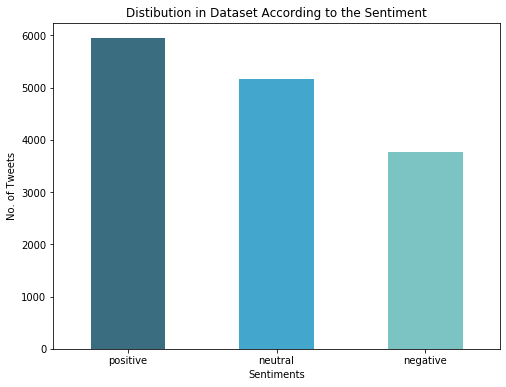

In [5]:
colors=sns.color_palette("GnBu_d", 3)
pd.Series(data_df["Sentiment"]).value_counts().plot(kind = "bar", color=colors, figsize=(8,6), rot=0, title = "Distibution in Dataset According to the Sentiment")
plt.xlabel('Sentiments', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

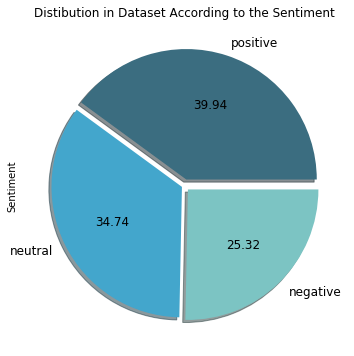

In [6]:
colors=sns.color_palette("GnBu_d", 3)
pd.Series(data_df["Sentiment"]).value_counts().plot(kind="pie",colors=colors, labels=["positive","neutral","negative"],explode=[0.05,0.02,0.04],
shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Distibution in Dataset According to the Sentiment")

# Natural Language Processing (NLP)

## Step 1: Remove URLs

In [7]:
data_df['Clean_Tweet'] = data_df['Tweet'].apply(lambda x: re.sub(r"http\S+", "", str(x)))
data_df.head(10)

,Tweet,Sentiment,Clean_Tweet
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...
1,Ukraine finally announced an investigation #Tr...,neutral,Ukraine finally announced an investigation #Tr...
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive,"Samsung smart TVs up to $2,000 off on Amazon a..."
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative,@tian72027 @darkonerising @Paintrain83 @Matthe...
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive,"Dean Cheng: Trump\'s China Trade Deal ""Sends C..."
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral,#Kushner is to #Trump what\n#Monica was to #Bi...
6,Barr is a lovesick unrequited love major domo....,positive,Barr is a lovesick unrequited love major domo....
7,The #Trump administration is also reportedly c...,negative,The #Trump administration is also reportedly c...
8,Ukraine announces probe into surveillance of Y...,positive,Ukraine announces probe into surveillance of Y...
9,@myawesomelife4 @realDonaldTrump More than the...,positive,@myawesomelife4 @realDonaldTrump More than the...


## Step 2: Remove Retweets "RT"

In [8]:
data_df['Clean_Tweet'] = data_df['Clean_Tweet'].apply(lambda x: re.sub(r"RT", "", str(x)))
data_df.head(10)

,Tweet,Sentiment,Clean_Tweet
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...
1,Ukraine finally announced an investigation #Tr...,neutral,Ukraine finally announced an investigation #Tr...
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive,"Samsung smart TVs up to $2,000 off on Amazon a..."
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative,@tian72027 @darkonerising @Paintrain83 @Matthe...
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive,"Dean Cheng: Trump\'s China Trade Deal ""Sends C..."
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral,#Kushner is to #Trump what\n#Monica was to #Bi...
6,Barr is a lovesick unrequited love major domo....,positive,Barr is a lovesick unrequited love major domo....
7,The #Trump administration is also reportedly c...,negative,The #Trump administration is also reportedly c...
8,Ukraine announces probe into surveillance of Y...,positive,Ukraine announces probe into surveillance of Y...
9,@myawesomelife4 @realDonaldTrump More than the...,positive,@myawesomelife4 @realDonaldTrump More than the...


## Step 3: Convert HTML entities

In [9]:
from html.parser import HTMLParser
html_parser = HTMLParser()
#remove float values from tweet column
for index, row in data_df.iterrows():
    if type(row['Tweet']) == float:
        data_df.drop(index, inplace=True)
#"&lt;" is converted to “<”, "&gt;" is converted to “>” and "&amp;" is converted to “&”
data_df['Clean_Tweet'] = data_df['Clean_Tweet'].apply(lambda x: html_parser.unescape(x))
data_df.head(10)

,Tweet,Sentiment,Clean_Tweet
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...
1,Ukraine finally announced an investigation #Tr...,neutral,Ukraine finally announced an investigation #Tr...
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive,"Samsung smart TVs up to $2,000 off on Amazon a..."
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative,@tian72027 @darkonerising @Paintrain83 @Matthe...
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive,"Dean Cheng: Trump\'s China Trade Deal ""Sends C..."
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral,#Kushner is to #Trump what\n#Monica was to #Bi...
6,Barr is a lovesick unrequited love major domo....,positive,Barr is a lovesick unrequited love major domo....
7,The #Trump administration is also reportedly c...,negative,The #Trump administration is also reportedly c...
8,Ukraine announces probe into surveillance of Y...,positive,Ukraine announces probe into surveillance of Y...
9,@myawesomelife4 @realDonaldTrump More than the...,positive,@myawesomelife4 @realDonaldTrump More than the...


## Step 4: Remove mentions "@user" 

In [10]:
def remove_mentions(tweet, pattern):
    r = re.findall(pattern, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [11]:
# remove all mentions
data_df['Clean_Tweet'] = np.vectorize(remove_mentions)(data_df['Clean_Tweet'], "@[\w]*")
data_df.head(10)

,Tweet,Sentiment,Clean_Tweet
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...
1,Ukraine finally announced an investigation #Tr...,neutral,Ukraine finally announced an investigation #Tr...
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive,"Samsung smart TVs up to $2,000 off on Amazon a..."
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative,Um. I\'ll bet you that 95% of america nev...
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive,"Dean Cheng: Trump\'s China Trade Deal ""Sends C..."
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral,#Kushner is to #Trump what\n#Monica was to #Bi...
6,Barr is a lovesick unrequited love major domo....,positive,Barr is a lovesick unrequited love major domo....
7,The #Trump administration is also reportedly c...,negative,The #Trump administration is also reportedly c...
8,Ukraine announces probe into surveillance of Y...,positive,Ukraine announces probe into surveillance of Y...
9,@myawesomelife4 @realDonaldTrump More than the...,positive,More than the ridiculous clown show House #...


## Step 5: Convert all tweets into lowercase

In [12]:
data_df['Clean_Tweet'] = data_df['Clean_Tweet'].apply(lambda x: x.lower())
data_df.head(10)

,Tweet,Sentiment,Clean_Tweet
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral,celestia is hillary in disguise #donaldjhooffo...
1,Ukraine finally announced an investigation #Tr...,neutral,ukraine finally announced an investigation #tr...
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive,"samsung smart tvs up to $2,000 off on amazon a..."
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative,um. i\'ll bet you that 95% of america nev...
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive,"dean cheng: trump\'s china trade deal ""sends c..."
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral,#kushner is to #trump what\n#monica was to #bi...
6,Barr is a lovesick unrequited love major domo....,positive,barr is a lovesick unrequited love major domo....
7,The #Trump administration is also reportedly c...,negative,the #trump administration is also reportedly c...
8,Ukraine announces probe into surveillance of Y...,positive,ukraine announces probe into surveillance of y...
9,@myawesomelife4 @realDonaldTrump More than the...,positive,more than the ridiculous clown show house #...


## Step 6: Replace Apostrophe words

In [13]:
# Contraction Dictionary
apostr_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [14]:
def search_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [15]:
data_df['Clean_Tweet'] = data_df['Clean_Tweet'].apply(lambda x: search_dict(x,apostr_dict))
data_df.head(10)

,Tweet,Sentiment,Clean_Tweet
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral,celestia is hillary in disguise #donaldjhooffo...
1,Ukraine finally announced an investigation #Tr...,neutral,ukraine finally announced an investigation #tr...
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive,"samsung smart tvs up to $2,000 off on amazon a..."
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative,um. i\'ll bet you that 95% of america nev...
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive,"dean cheng: trump\'s china trade deal ""sends c..."
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral,#kushner is to #trump what\n#monica was to #bi...
6,Barr is a lovesick unrequited love major domo....,positive,barr is a lovesick unrequited love major domo....
7,The #Trump administration is also reportedly c...,negative,the #trump administration is also reportedly c...
8,Ukraine announces probe into surveillance of Y...,positive,ukraine announces probe into surveillance of y...
9,@myawesomelife4 @realDonaldTrump More than the...,positive,more than the ridiculous clown show house #...


## Step 7: Replace Abbreviations

In [16]:
abbreviations_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [17]:
data_df['Clean_Tweet'] = data_df['Clean_Tweet'].apply(lambda x: search_dict(x,abbreviations_dict))
data_df.head(10)

,Tweet,Sentiment,Clean_Tweet
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral,celestia is hillary in disguise #donaldjhooffo...
1,Ukraine finally announced an investigation #Tr...,neutral,ukraine finally announced an investigation #tr...
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive,"samsung smart tvs up to $2,000 off on amazon a..."
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative,um. i\'ll bet you that 95% of america nev...
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive,"dean cheng: trump\'s china trade deal ""sends c..."
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral,#kushner is to #trump what\n#monica was to #bi...
6,Barr is a lovesick unrequited love major domo....,positive,barr is a lovesick unrequited love major domo....
7,The #Trump administration is also reportedly c...,negative,the #trump administration is also reportedly c...
8,Ukraine announces probe into surveillance of Y...,positive,ukraine announces probe into surveillance of y...
9,@myawesomelife4 @realDonaldTrump More than the...,positive,more than the ridiculous clown show house #...


## Step 8: Replace Emoticons with words that express positive or negative sentiment

In [18]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [19]:
data_df['Clean_Tweet'] = data_df['Clean_Tweet'].apply(lambda x: search_dict(x,emoticon_dict))
data_df.head(10)

,Tweet,Sentiment,Clean_Tweet
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral,celestia is hillary in disguise #donaldjhooffo...
1,Ukraine finally announced an investigation #Tr...,neutral,ukraine finally announced an investigation #tr...
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive,"samsung smart tvs up to $2,000 off on amazon a..."
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative,um. i\'ll bet you that 95% of america nev...
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive,"dean cheng: trump\'s china trade deal ""sends c..."
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral,#kushner is to #trump what\n#monica was to #bi...
6,Barr is a lovesick unrequited love major domo....,positive,barr is a lovesick unrequited love major domo....
7,The #Trump administration is also reportedly c...,negative,the #trump administration is also reportedly c...
8,Ukraine announces probe into surveillance of Y...,positive,ukraine announces probe into surveillance of y...
9,@myawesomelife4 @realDonaldTrump More than the...,positive,more than the ridiculous clown show house #...


## Step 9: Remove Punctuations

In [20]:
data_df['Clean_Tweet'] = data_df['Clean_Tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
data_df.head(10)

,Tweet,Sentiment,Clean_Tweet
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral,celestia is hillary in disguise donaldjhooffo...
1,Ukraine finally announced an investigation #Tr...,neutral,ukraine finally announced an investigation tr...
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive,samsung smart tvs up to 2 000 off on amazon a...
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative,um i ll bet you that 95 of america nev...
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive,dean cheng trump s china trade deal sends c...
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral,kushner is to trump what n monica was to bi...
6,Barr is a lovesick unrequited love major domo....,positive,barr is a lovesick unrequited love major domo ...
7,The #Trump administration is also reportedly c...,negative,the trump administration is also reportedly c...
8,Ukraine announces probe into surveillance of Y...,positive,ukraine announces probe into surveillance of y...
9,@myawesomelife4 @realDonaldTrump More than the...,positive,more than the ridiculous clown show house ...


## Step 10: Remove Special Characters

In [21]:
data_df['Clean_Tweet'] = data_df['Clean_Tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
data_df.head(10)

,Tweet,Sentiment,Clean_Tweet
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral,celestia is hillary in disguise donaldjhooffo...
1,Ukraine finally announced an investigation #Tr...,neutral,ukraine finally announced an investigation tr...
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive,samsung smart tvs up to 2 000 off on amazon a...
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative,um i ll bet you that 95 of america nev...
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive,dean cheng trump s china trade deal sends c...
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral,kushner is to trump what n monica was to bi...
6,Barr is a lovesick unrequited love major domo....,positive,barr is a lovesick unrequited love major domo ...
7,The #Trump administration is also reportedly c...,negative,the trump administration is also reportedly c...
8,Ukraine announces probe into surveillance of Y...,positive,ukraine announces probe into surveillance of y...
9,@myawesomelife4 @realDonaldTrump More than the...,positive,more than the ridiculous clown show house ...


## Step 11: Remove Numbers

In [22]:
data_df['Clean_Tweet'] = data_df['Clean_Tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
data_df.head(10)

,Tweet,Sentiment,Clean_Tweet
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral,celestia is hillary in disguise donaldjhooffo...
1,Ukraine finally announced an investigation #Tr...,neutral,ukraine finally announced an investigation tr...
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive,samsung smart tvs up to off on amazon a...
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative,um i ll bet you that of america nev...
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive,dean cheng trump s china trade deal sends c...
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral,kushner is to trump what n monica was to bi...
6,Barr is a lovesick unrequited love major domo....,positive,barr is a lovesick unrequited love major domo ...
7,The #Trump administration is also reportedly c...,negative,the trump administration is also reportedly c...
8,Ukraine announces probe into surveillance of Y...,positive,ukraine announces probe into surveillance of y...
9,@myawesomelife4 @realDonaldTrump More than the...,positive,more than the ridiculous clown show house ...


## Step 12: Remove words with length equal to 1

In [23]:
data_df['Clean_Tweet'] = data_df['Clean_Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
data_df.head(10)

,Tweet,Sentiment,Clean_Tweet
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral,celestia is hillary in disguise donaldjhooffor...
1,Ukraine finally announced an investigation #Tr...,neutral,ukraine finally announced an investigation tru...
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive,samsung smart tvs up to off on amazon ahead of...
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative,um ll bet you that of america never even heard...
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive,dean cheng trump china trade deal sends clear ...
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral,kushner is to trump what monica was to bill nm...
6,Barr is a lovesick unrequited love major domo....,positive,barr is lovesick unrequited love major domo he...
7,The #Trump administration is also reportedly c...,negative,the trump administration is also reportedly co...
8,Ukraine announces probe into surveillance of Y...,positive,ukraine announces probe into surveillance of y...
9,@myawesomelife4 @realDonaldTrump More than the...,positive,more than the ridiculous clown show house trum...


## Step 13: Tokenization

In [24]:
from nltk.tokenize import word_tokenize
# New column creation Tweet_Token that consist lists of tokens of clean tweets
data_df['Tweet_Tokenized'] = data_df['Clean_Tweet'].apply(lambda x: word_tokenize(x))
data_df.head(10)

,Tweet,Sentiment,Clean_Tweet,Tweet_Tokenized
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral,celestia is hillary in disguise donaldjhooffor...,"[celestia, is, hillary, in, disguise, donaldjh..."
1,Ukraine finally announced an investigation #Tr...,neutral,ukraine finally announced an investigation tru...,"[ukraine, finally, announced, an, investigatio..."
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive,samsung smart tvs up to off on amazon ahead of...,"[samsung, smart, tvs, up, to, off, on, amazon,..."
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative,um ll bet you that of america never even heard...,"[um, ll, bet, you, that, of, america, never, e..."
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive,dean cheng trump china trade deal sends clear ...,"[dean, cheng, trump, china, trade, deal, sends..."
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral,kushner is to trump what monica was to bill nm...,"[kushner, is, to, trump, what, monica, was, to..."
6,Barr is a lovesick unrequited love major domo....,positive,barr is lovesick unrequited love major domo he...,"[barr, is, lovesick, unrequited, love, major, ..."
7,The #Trump administration is also reportedly c...,negative,the trump administration is also reportedly co...,"[the, trump, administration, is, also, reporte..."
8,Ukraine announces probe into surveillance of Y...,positive,ukraine announces probe into surveillance of y...,"[ukraine, announces, probe, into, surveillance..."
9,@myawesomelife4 @realDonaldTrump More than the...,positive,more than the ridiculous clown show house trum...,"[more, than, the, ridiculous, clown, show, hou..."


## Step 14: Remove Stop Words

In [25]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eirinimitsopoulou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [26]:
# New column creation Tweet_Token_Filtered that cosists of tokens where stop words are being removed
data_df['Tweet_Stopwords'] = data_df['Tweet_Tokenized'].apply(lambda x: [word for word in x if not word in stop_words])
data_df.head(10)

,Tweet,Sentiment,Clean_Tweet,Tweet_Tokenized,Tweet_Stopwords
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral,celestia is hillary in disguise donaldjhooffor...,"[celestia, is, hillary, in, disguise, donaldjh...","[celestia, hillary, disguise, donaldjhoofforpr..."
1,Ukraine finally announced an investigation #Tr...,neutral,ukraine finally announced an investigation tru...,"[ukraine, finally, announced, an, investigatio...","[ukraine, finally, announced, investigation, t..."
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive,samsung smart tvs up to off on amazon ahead of...,"[samsung, smart, tvs, up, to, off, on, amazon,...","[samsung, smart, tvs, amazon, ahead, super, bo..."
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative,um ll bet you that of america never even heard...,"[um, ll, bet, you, that, of, america, never, e...","[um, bet, america, never, even, heard, guy, tr..."
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive,dean cheng trump china trade deal sends clear ...,"[dean, cheng, trump, china, trade, deal, sends...","[dean, cheng, trump, china, trade, deal, sends..."
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral,kushner is to trump what monica was to bill nm...,"[kushner, is, to, trump, what, monica, was, to...","[kushner, trump, monica, bill, nmakes, sense]"
6,Barr is a lovesick unrequited love major domo....,positive,barr is lovesick unrequited love major domo he...,"[barr, is, lovesick, unrequited, love, major, ...","[barr, lovesick, unrequited, love, major, domo..."
7,The #Trump administration is also reportedly c...,negative,the trump administration is also reportedly co...,"[the, trump, administration, is, also, reporte...","[trump, administration, also, reportedly, cons..."
8,Ukraine announces probe into surveillance of Y...,positive,ukraine announces probe into surveillance of y...,"[ukraine, announces, probe, into, surveillance...","[ukraine, announces, probe, surveillance, yova..."
9,@myawesomelife4 @realDonaldTrump More than the...,positive,more than the ridiculous clown show house trum...,"[more, than, the, ridiculous, clown, show, hou...","[ridiculous, clown, show, house, trump, busy, ..."


## Step 15: Lemmatization

In [27]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()
# New column creation tweet_lemmatized that converts words to theis base form
data_df['Tweet_Lemmatized'] = data_df['Tweet_Stopwords'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
data_df.head(10)

,Tweet,Sentiment,Clean_Tweet,Tweet_Tokenized,Tweet_Stopwords,Tweet_Lemmatized
0,CELESTIA IS HILLARY IN DISGUISE #DonaldJHoofFo...,neutral,celestia is hillary in disguise donaldjhooffor...,"[celestia, is, hillary, in, disguise, donaldjh...","[celestia, hillary, disguise, donaldjhoofforpr...",celestia hillary disguise donaldjhoofforpresid...
1,Ukraine finally announced an investigation #Tr...,neutral,ukraine finally announced an investigation tru...,"[ukraine, finally, announced, an, investigatio...","[ukraine, finally, announced, investigation, t...",ukraine finally announced investigation trump ...
2,"Samsung smart TVs up to $2,000 off on Amazon a...",positive,samsung smart tvs up to off on amazon ahead of...,"[samsung, smart, tvs, up, to, off, on, amazon,...","[samsung, smart, tvs, amazon, ahead, super, bo...",samsung smart tv amazon ahead super bowl super...
3,@tian72027 @darkonerising @Paintrain83 @Matthe...,negative,um ll bet you that of america never even heard...,"[um, ll, bet, you, that, of, america, never, e...","[um, bet, america, never, even, heard, guy, tr...",um bet america never even heard guy trump tell...
4,"Dean Cheng: Trump\'s China Trade Deal ""Sends C...",positive,dean cheng trump china trade deal sends clear ...,"[dean, cheng, trump, china, trade, deal, sends...","[dean, cheng, trump, china, trade, deal, sends...",dean cheng trump china trade deal sends clear ...
5,#Kushner is to #Trump what\n#Monica was to #Bi...,neutral,kushner is to trump what monica was to bill nm...,"[kushner, is, to, trump, what, monica, was, to...","[kushner, trump, monica, bill, nmakes, sense]",kushner trump monica bill nmakes sense
6,Barr is a lovesick unrequited love major domo....,positive,barr is lovesick unrequited love major domo he...,"[barr, is, lovesick, unrequited, love, major, ...","[barr, lovesick, unrequited, love, major, domo...",barr lovesick unrequited love major domo well ...
7,The #Trump administration is also reportedly c...,negative,the trump administration is also reportedly co...,"[the, trump, administration, is, also, reporte...","[trump, administration, also, reportedly, cons...",trump administration also reportedly consideri...
8,Ukraine announces probe into surveillance of Y...,positive,ukraine announces probe into surveillance of y...,"[ukraine, announces, probe, into, surveillance...","[ukraine, announces, probe, surveillance, yova...",ukraine announces probe surveillance yovanovit...
9,@myawesomelife4 @realDonaldTrump More than the...,positive,more than the ridiculous clown show house trum...,"[more, than, the, ridiculous, clown, show, hou...","[ridiculous, clown, show, house, trump, busy, ...",ridiculous clown show house trump busy actuall...


In [28]:
# keep only Sentiment & Tweet_Lemmatized columns
data_df.drop(['Tweet', 'Clean_Tweet', 'Tweet_Tokenized', 'Tweet_Stopwords'], axis=1, inplace=True)
for index, row in data_df.iterrows():
    if pd.isnull(row['Tweet_Lemmatized']):
        data_df.drop(index, inplace=True)

# Machine Learning Algorithms For Sentiment Clasification

## Define Classifiers

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [30]:
Classifiers = [
    MultinomialNB(),
    SVC(kernel='linear'),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(min_samples_split=10),
    RandomForestClassifier(bootstrap=False,max_features=0.1,min_samples_split=10),
    MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,))]

## Split Data Set using 10-fold Cross-Validation -- Classification process & Performance Results 

In [31]:
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from time import time

# Split data_df into train & test data sets using k-fold Cross-Validation
kf = KFold(n_splits = 10, shuffle = True, random_state = 2) # set k = 10 (train set = 90%, test set = 10%)

k = 1 # counts iterations

#  Performance Metrics of Classifiers - Ιnitialization
multinomialAccuracy = 0
svcAccuracy = 0
kneighborsClassifierAccuracy = 0
decisionTreeClassifierAccuracy = 0
randomForestClassifierAccuracy = 0
mlpClassifierAccuracy = 0

multinomialPrecision = 0
svcPrecision = 0
kneighborsClassifierPrecision = 0
decisionTreeClassifierPrecision = 0
randomForestClassifierPrecision = 0
mlpClassifierPrecision = 0

multinomialRecall = 0
svcRecall = 0
kneighborsClassifierRecall = 0
decisionTreeClassifierRecall = 0
randomForestClassifierRecall = 0
mlpClassifierRecall = 0

multinomialF1 = 0
svcF1 = 0
kneighborsClassifierF1 = 0
decisionTreeClassifierF1 = 0
randomForestClassifierF1 = 0
mlpClassifierF1 = 0

#  Average Value of Performance Metrics of Classifiers - Ιnitialization
Accuracy=[]
Precision =[]
Recall =[]
F1 =[]

#  Array of Classifiers' Names - Ιnitialization
Model=[] 

# k Iterations for k-fold Cross-Validation
for train_df, test_df in kf.split(data_df):
    print("")
    print("")
    print("*****************************************************")
    print("---------------------", k," Iteration ------------------")
    print("*****************************************************")
    k = k + 1
    
    train = data_df.iloc[train_df]
    test = data_df.iloc[test_df]
    train_processed_tweet=[]
    for tweets in train['Tweet_Lemmatized']:
        train_processed_tweet.append(tweets)
    test_processed_tweet=[]
    for tweets in test['Tweet_Lemmatized']:
        test_processed_tweet.append(tweets)
    
    # Feature extraction from text - Bag of Words
    v = CountVectorizer(analyzer = "word")
    train_features= v.fit_transform(train_processed_tweet)
    test_features=v.transform(test_processed_tweet)
    
    # Classification process & Performance Results
    dense_features=train_features.toarray()
    dense_test= test_features.toarray()

    for classifier in Classifiers:
        Model.append(classifier.__class__.__name__)
        print("")
        print("")
        print("=====================================================")
        print("Testing " + classifier.__class__.__name__)

        try:
            now = time()
            fit = classifier.fit(train_features,train['Sentiment']) # model training
            print("Learing time {0}s".format(time() - now)) # learning time
            now = time()
            pred = fit.predict(test_features) # model predictions
            print("Predicting time {0}s".format(time() - now)) # predicting time
        except Exception:
            now = time()
            fit = classifier.fit(dense_features,train['Sentiment']) # model training
            print("Learing time {0}s".format(time() - now)) # learning time
            now = time()
            pred = fit.predict(dense_test)   # model predictions
            print("Predicting time {0}s".format(time() - now)) # predicting time

        list_of_labels = sorted(list(set(train['Sentiment'])))

        accuracy = accuracy_score(pred,test['Sentiment']) # computes accuracy of predictions
        precision = precision_score(pred, test['Sentiment'], average='weighted')  # computes precision of predictions
        recall = recall_score(pred, test['Sentiment'], average='weighted')  # computes recall of predictions
        f1 = f1_score(pred, test['Sentiment'], average='weighted')  # computes f1-score of predictions
        
        if "MultinomialNB" == classifier.__class__.__name__: # performance metrics of MultinomialNB
            multinomialAccuracy = multinomialAccuracy +float("{0:.3f}".format(accuracy))
            multinomialPrecision = multinomialPrecision + float("{0:.3f}".format(precision))
            multinomialRecall = multinomialRecall + float("{0:.3f}".format(recall))
            multinomialF1 = multinomialF1 + float("{0:.3f}".format(f1))
        elif "SVC" == classifier.__class__.__name__:  # performance metrics of SVC
            svcAccuracy = svcAccuracy + float("{0:.3f}".format(accuracy))
            svcPrecision = svcPrecision + float("{0:.3f}".format(precision))
            svcRecall = svcRecall + float("{0:.3f}".format(recall))
            svcF1 = svcF1 + float("{0:.3f}".format(f1))
        elif "KNeighborsClassifier" == classifier.__class__.__name__: # performance metrics of KNN
            kneighborsClassifierAccuracy = kneighborsClassifierAccuracy + float("{0:.3f}".format(accuracy))
            kneighborsClassifierPrecision = kneighborsClassifierPrecision + float("{0:.3f}".format(precision))
            kneighborsClassifierRecall = kneighborsClassifierRecall + float("{0:.3f}".format(recall))
            kneighborsClassifierF1 = kneighborsClassifierF1 + float("{0:.3f}".format(f1))
        elif "DecisionTreeClassifier" == classifier.__class__.__name__: # performance metrics of DecisionTree
            decisionTreeClassifierAccuracy = decisionTreeClassifierAccuracy + float("{0:.3f}".format(accuracy))
            decisionTreeClassifierPrecision = decisionTreeClassifierPrecision + float("{0:.3f}".format(precision))
            decisionTreeClassifierRecall = decisionTreeClassifierRecall + float("{0:.3f}".format(recall))
            decisionTreeClassifierF1 = decisionTreeClassifierF1 + float("{0:.3f}".format(f1))
        elif "RandomForestClassifier" == classifier.__class__.__name__: # performance metrics of RandomForest
            randomForestClassifierAccuracy = randomForestClassifierAccuracy + float("{0:.3f}".format(accuracy))
            randomForestClassifierPrecision = randomForestClassifierPrecision + float("{0:.3f}".format(precision))
            randomForestClassifierRecall = randomForestClassifierRecall + float("{0:.3f}".format(recall))
            randomForestClassifierF1 = randomForestClassifierF1 + float("{0:.3f}".format(f1))
        else:  # performance metrics of MLP
            mlpClassifierAccuracy = mlpClassifierAccuracy + float("{0:.3f}".format(accuracy))
            mlpClassifierPrecision = mlpClassifierPrecision + float("{0:.3f}".format(precision))
            mlpClassifierRecall = mlpClassifierRecall + float("{0:.3f}".format(recall))
            mlpClassifierF1 = mlpClassifierF1 + float("{0:.3f}".format(f1))

        print("")
        print("---------------------- Results ----------------------")
        print(classification_report(pred,test['Sentiment']))
        cm=confusion_matrix(pred , test['Sentiment'])
        plt.figure()
        print("=====================================================")

# computes average value of performance metrics
Accuracy.append(float("{0:.3f}".format(multinomialAccuracy/(k-1)))) 
Accuracy.append(float("{0:.3f}".format(svcAccuracy/(k-1))))
Accuracy.append(float("{0:.3f}".format(kneighborsClassifierAccuracy/(k-1))))
Accuracy.append(float("{0:.3f}".format(decisionTreeClassifierAccuracy/(k-1))))
Accuracy.append(float("{0:.3f}".format(randomForestClassifierAccuracy/(k-1))))
Accuracy.append(float("{0:.3f}".format(mlpClassifierAccuracy/(k-1))))

Precision.append(float("{0:.3f}".format(multinomialPrecision/(k-1))))
Precision.append(float("{0:.3f}".format(svcPrecision/(k-1))))
Precision.append(float("{0:.3f}".format(kneighborsClassifierPrecision/(k-1))))
Precision.append(float("{0:.3f}".format(decisionTreeClassifierPrecision/(k-1))))
Precision.append(float("{0:.3f}".format(randomForestClassifierPrecision/(k-1))))
Precision.append(float("{0:.3f}".format(mlpClassifierPrecision/(k-1))))

Recall.append(float("{0:.3f}".format(multinomialRecall/(k-1))))
Recall.append(float("{0:.3f}".format(svcRecall/(k-1))))
Recall.append(float("{0:.3f}".format(kneighborsClassifierRecall/(k-1))))
Recall.append(float("{0:.3f}".format(decisionTreeClassifierRecall/(k-1))))
Recall.append(float("{0:.3f}".format(randomForestClassifierRecall/(k-1))))
Recall.append(float("{0:.3f}".format(mlpClassifierRecall/(k-1))))

F1.append(float("{0:.3f}".format(multinomialF1/(k-1))))
F1.append(float("{0:.3f}".format(svcF1/(k-1))))
F1.append(float("{0:.3f}".format(kneighborsClassifierF1/(k-1))))
F1.append(float("{0:.3f}".format(decisionTreeClassifierF1/(k-1))))
F1.append(float("{0:.3f}".format(randomForestClassifierF1/(k-1))))
F1.append(float("{0:.3f}".format(mlpClassifierF1/(k-1))))



*****************************************************
--------------------- 1  Iteration ------------------
*****************************************************


Testing MultinomialNB
Learing time 0.041442155838012695s
Predicting time 0.0008938312530517578s

---------------------- Results ----------------------
              precision    recall  f1-score   support

    negative       0.67      0.60      0.63       409
     neutral       0.56      0.74      0.64       402
    positive       0.76      0.66      0.71       678

    accuracy                           0.67      1489
   macro avg       0.66      0.67      0.66      1489
weighted avg       0.68      0.67      0.67      1489



Testing SVC
Learing time 24.37118697166443s
Predicting time 1.3435649871826172s

---------------------- Results ----------------------
              precision    recall  f1-score   support

    negative       0.72      0.76      0.74       353
     neutral       0.89      0.82      0.86       577
  

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Average Accuracy of Classifiers

[0.677, 0.815, 0.523, 0.811, 0.833, 0.786]


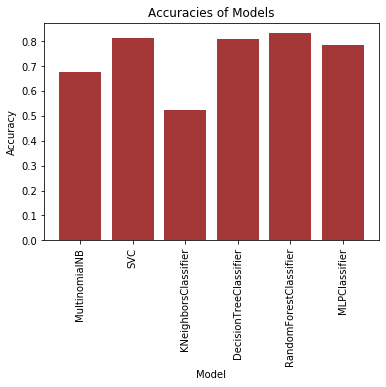

In [32]:
Index = [1,2,3,4,5,6]
plt.bar(Index,Accuracy,color='#a33636')
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
print(Accuracy)

## Average Precision of Classifiers

[0.692, 0.818, 0.702, 0.815, 0.839, 0.787]


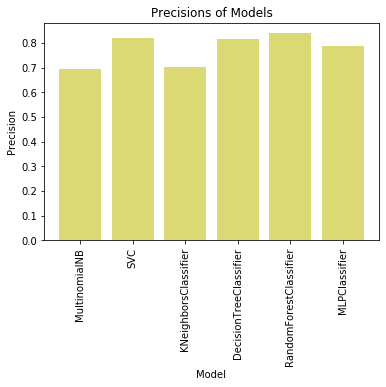

In [33]:
Index = [1,2,3,4,5,6]
plt.bar(Index,Precision,color='#dbd974')
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Precision')
plt.xlabel('Model')
plt.title('Precisions of Models')
print(Precision)

## Average Recall of Classifiers

[0.677, 0.815, 0.523, 0.811, 0.833, 0.786]


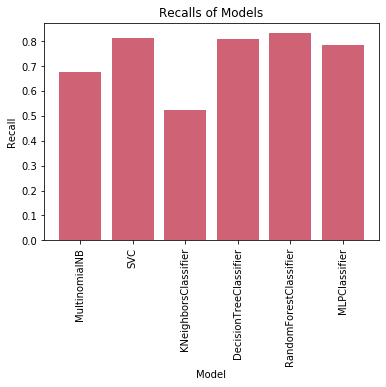

In [34]:
Index = [1,2,3,4,5,6]
plt.bar(Index,Recall,color='#cf6275')
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.title('Recalls of Models')
print(Recall)

## Average F-Score of Classifiers

[0.678, 0.816, 0.547, 0.812, 0.835, 0.786]


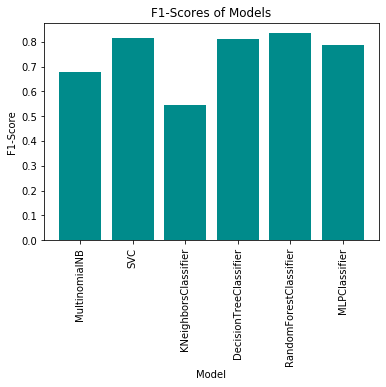

In [35]:
Index = [1,2,3,4,5,6]
plt.bar(Index,F1,color='darkcyan')
plt.xticks(Index, Model, rotation=90)
plt.ylabel('F1-Score')
plt.xlabel('Model')
plt.title('F1-Scores of Models')
print(F1)

## Evaluation Metrics of Classifiers

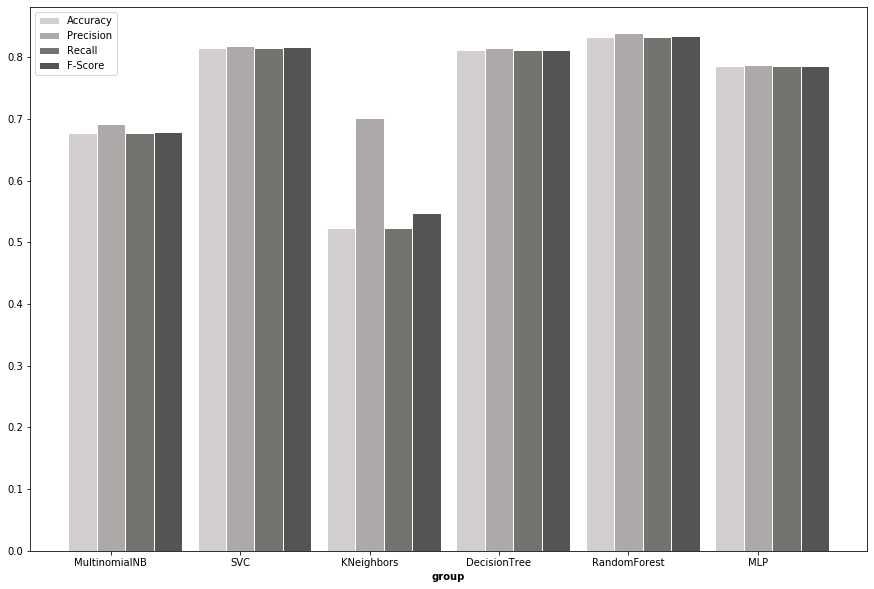

In [4]:
# set width of bar
barWidth = 0.22
height = 15
width = 10
ax = plt.subplots(figsize=(height,width))
 
# set height of bar
bars1 = Accuracy
bars2 = Precision
bars3 = Recall
bars4 = F1
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='#d1cecd', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, bars2, color='#ada9a8', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r3, bars3, color='#73736f', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r4, bars4, color='#545452', width=barWidth, edgecolor='white', label='F-Score')


 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['MultinomialNB', 'SVC', 'KNeighbors', 'DecisionTree', 'RandomForest', 'MLP'],rotation=90)
 
# Create legend & Show graphic
plt.legend()
plt.show()

